In [1]:
'''
Boston Marathon Winners Dataset
'''

'\nBoston Marathon Winners Dataset\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
%matplotlib inline
import seaborn; seaborn.set()  # for plot styling

In [4]:
from datetime import datetime, timedelta

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

mens_data = pd.read_csv('Mens_Boston_Marathon_Winners.csv',
                   converters={'Time':convert_time})
mens_data.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1897,John McDermott,United States,02:55:10,24.5,39.4
1,1898,Ronald MacDonald,Canada,02:42:00,24.5,39.4
2,1899,Lawrence Brignolia,United States,02:54:38,24.5,39.4
3,1900,Jack Caffery,Canada,02:39:44,24.5,39.4
4,1901,Jack Caffery,Canada,02:29:23,24.5,39.4


In [5]:
mens_data['Time_sec'] = mens_data['Time'].astype(int) / 1E9
mens_data.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM),Time_sec
0,1897,John McDermott,United States,02:55:10,24.5,39.4,10510.0
1,1898,Ronald MacDonald,Canada,02:42:00,24.5,39.4,9720.0
2,1899,Lawrence Brignolia,United States,02:54:38,24.5,39.4,10478.0
3,1900,Jack Caffery,Canada,02:39:44,24.5,39.4,9584.0
4,1901,Jack Caffery,Canada,02:29:23,24.5,39.4,8963.0


In [6]:
mens_data['Time_hours'] = mens_data['Time'].astype(int) / 1E9 * (1/3600)
mens_data.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM),Time_sec,Time_hours
0,1897,John McDermott,United States,02:55:10,24.5,39.4,10510.0,2.919444
1,1898,Ronald MacDonald,Canada,02:42:00,24.5,39.4,9720.0,2.700000
2,1899,Lawrence Brignolia,United States,02:54:38,24.5,39.4,10478.0,2.910556
3,1900,Jack Caffery,Canada,02:39:44,24.5,39.4,9584.0,2.662222
4,1901,Jack Caffery,Canada,02:29:23,24.5,39.4,8963.0,2.489722


In [7]:
mens_year = mens_data['Year']
mens_time = mens_data['Time_hours']

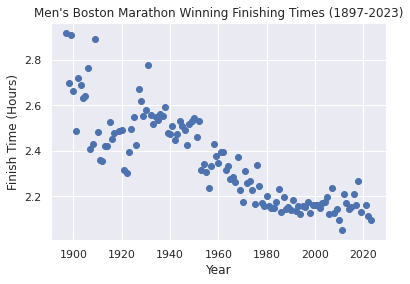

In [8]:
plt.scatter(mens_year, mens_time); #scatterplot of men's marathon times from 1897 to 2022
plt.xlabel('Year')
plt.ylabel('Finish Time (Hours)')
plt.title("Men's Boston Marathon Winning Finishing Times (1897-2023)")
plt.show()

Model slope:  -0.004675062140503639 hours or -16.8302237058131 seconds
Model intercept:  11.518848586438901 hours
Line of Best Fit Equation: y = -0.004675062140503639 * x + 11.518848586438901


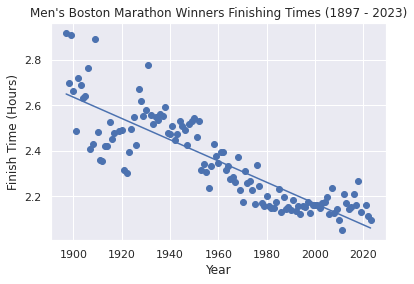

In [9]:
#creates line of best fit on scatterplot for Men's Boston Marathon Winners' Finishing times from 1897 to 2023. 
from sklearn.metrics import mean_squared_error

mens_model = LinearRegression(fit_intercept = True)

mens_model.fit(mens_year[:, np.newaxis], mens_time)

mens_xfit = np.linspace(1897, 2023)
mens_yfit = mens_model.predict(mens_xfit[:, np.newaxis])

plt.scatter(mens_year, mens_time)
plt.plot(mens_xfit, mens_yfit)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.title("Men's Boston Marathon Winners Finishing Times (1897 - 2023)")

print("Model slope: ", mens_model.coef_[0], "hours or", mens_model.coef_[0] * 3600, "seconds" )
print("Model intercept: ", mens_model.intercept_, "hours")
print("Line of Best Fit Equation: y =", mens_model.coef_[0], "* x +", mens_model.intercept_)

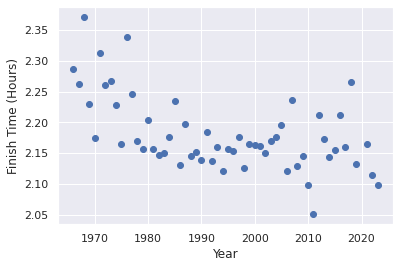

In [10]:
#scatterplot of Men's Boston Marathon Winners' Finishing Time from 1966 to 2023
mens_year_1966present = mens_year[68:]
mens_time_1966present = mens_time[68:]
plt.scatter(mens_year_1966present, mens_time_1966present)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.show()

Model slope:  -0.0019805158762305087 hours or -7.129857154429831 seconds
Model intercept:  6.130154454335521 hours
Line of Best Fit Equation: y = -0.0019805158762305087 * x + 6.130154454335521


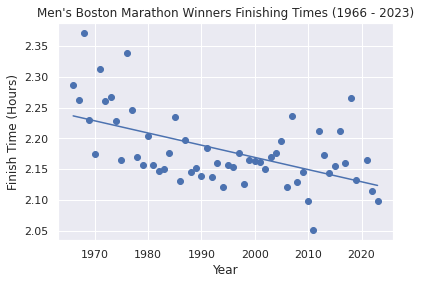

In [11]:
#line of best fit on scatterplot of Men's Boston Marathon Winners' Finishing Time from 1966 to 2023
mens_model_1966present = LinearRegression(fit_intercept = True)

mens_model_1966present.fit(mens_year_1966present[:, np.newaxis], mens_time_1966present)

mens_1966_xfit = np.linspace(1966, 2023)
mens_1966_yfit = mens_model_1966present.predict(mens_1966_xfit[:, np.newaxis])

plt.scatter(mens_year_1966present, mens_time_1966present)
plt.plot(mens_1966_xfit, mens_1966_yfit)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.title("Men's Boston Marathon Winners Finishing Times (1966 - 2023)");

print("Model slope: ", mens_model_1966present.coef_[0], "hours or", mens_model_1966present.coef_[0] * 3600, "seconds")
print("Model intercept: ", mens_model_1966present.intercept_, "hours")
print("Line of Best Fit Equation: y =", mens_model_1966present.coef_[0], "* x +", mens_model_1966present.intercept_)

In [12]:
womens_data = pd.read_csv('Womens_Boston_Marathon_Winners.csv',
                   converters={'Time':convert_time})
womens_data.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1966,Bobbi Gibb,United States,03:21:40,26.2,42.2
1,1967,Bobbi Gibb,United States,03:27:17,26.2,42.2
2,1968,Bobbi Gibb,United States,03:30:00,26.2,42.2
3,1969,Sara Mae Berman,United States,03:22:46,26.2,42.2
4,1970,Sara Mae Berman,United States,03:05:07,26.2,42.2


In [13]:
womens_data['Time_hours_womens'] = womens_data['Time'].astype(int) / 1E9 * (1/3600)
womens_data.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM),Time_hours_womens
0,1966,Bobbi Gibb,United States,03:21:40,26.2,42.2,3.361111
1,1967,Bobbi Gibb,United States,03:27:17,26.2,42.2,3.454722
2,1968,Bobbi Gibb,United States,03:30:00,26.2,42.2,3.500000
3,1969,Sara Mae Berman,United States,03:22:46,26.2,42.2,3.379444
4,1970,Sara Mae Berman,United States,03:05:07,26.2,42.2,3.085278


In [14]:
year_womens = womens_data['Year']
time_hours_womens = womens_data['Time_hours_womens']

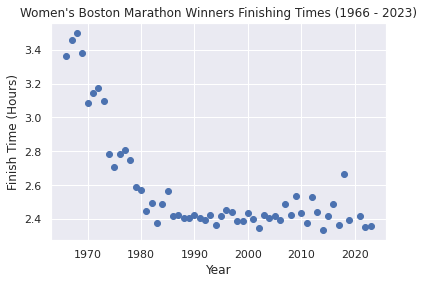

In [15]:
#scatterplot of Women's Boston Marathon Winners' Finishing Time from 1966 to 2023
plt.scatter(year_womens, time_hours_womens)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.show()

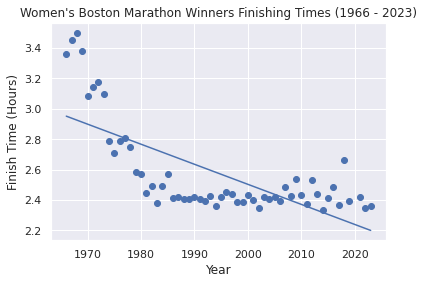

Model slope:  -0.01317760135854808 hours or -47.43936489077309 seconds
Model intercept:  28.858823844299025 hours
Line of Best Fit Equation: y = -0.01317760135854808 * x + 28.858823844299025


In [16]:
#line of best fit on scatterplot of Women's Boston Marathon Winners' Finishing Times from 1966 to 2023
model_womens = LinearRegression(fit_intercept = True)

model_womens.fit(year_womens[:, np.newaxis], time_hours_womens)

xfit_womens = np.linspace(1966, 2023)
yfit_womens = model_womens.predict(xfit_womens[:, np.newaxis])

plt.scatter(year_womens, time_hours_womens)
plt.xlabel('Year')
plt.ylabel('Finish Time (Hours)')
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.plot(xfit_womens, yfit_womens)
plt.show()

print("Model slope: ", model_womens.coef_[0], "hours or", model_womens.coef_[0] * 3600, "seconds")
print("Model intercept: ", model_womens.intercept_, "hours")
print("Line of Best Fit Equation: y =", model_womens.coef_[0], "* x +", model_womens.intercept_)

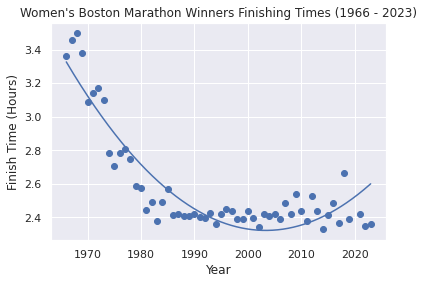

In [17]:
#Polynomial regression
year_womens_poly = np.array(year_womens)
time_hours_womens_poly = np.array(time_hours_womens)

# making data column vectors
year_womens_poly = year_womens_poly.reshape(-1, 1)
time_hours_womens_poly = time_hours_womens_poly.reshape(-1, 1)
degree = 2  

#polynomial features
poly_features = PolynomialFeatures(degree=degree)
x_poly_womens = poly_features.fit_transform(year_womens_poly)

#linear regression model on the polynomial features
model_womens_poly = LinearRegression()
model_womens_poly.fit(x_poly_womens, time_hours_womens_poly)

xfit_womens = np.linspace(1966, 2023, 1000)[:, np.newaxis]
xfit_poly_womens = poly_features.transform(xfit_womens)
yfit_womens = model_womens_poly.predict(xfit_poly_womens)

plt.scatter(year_womens, time_hours_womens)
plt.plot(xfit_womens, yfit_womens)
plt.xlabel('Year')
plt.ylabel('Finish Time (Hours)')
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.show()

In [18]:
#spliting women's data into two groups: one is data from 1966 to 1984, and the other is data from 1985 to 2023
womens_year_1966_1984 = year_womens[:19]
womens_year_1985present = year_womens[19:]
womens_time_1966_1984 = time_hours_womens[:19]
womens_time_1985present = time_hours_womens[19:]

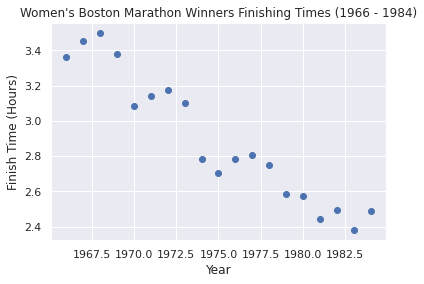

In [19]:
#Scatterplot of Women's Boston Marathon Winners' Finishing Times from 1966 to 1984
plt.scatter(womens_year_1966_1984, womens_time_1966_1984)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 1984)")
plt.show()

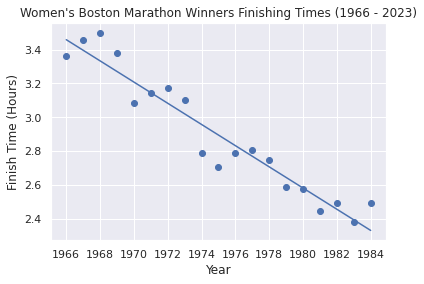

Model slope:  -0.06267007797270953 hours or -225.61228070175432 seconds
Model intercept:  126.66825779727091 hours
Line of Best Fit Equation: y = -0.06267007797270953 * x + 126.66825779727091


In [20]:
#line of best fit on scatterplot of Women's Boston Marathon Winners' Finishing Times from 1966 to 1984
model_womens_1966_1984 = LinearRegression(fit_intercept = True)

model_womens_1966_1984.fit(womens_year_1966_1984[:, np.newaxis], womens_time_1966_1984)

xfit_womens_1966_1984 = np.linspace(1966, 1984)
yfit_womens_1966_1984 = model_womens_1966_1984.predict(xfit_womens_1966_1984[:, np.newaxis])

plt.scatter(womens_year_1966_1984, womens_time_1966_1984)
plt.xlabel('Year')
plt.xticks(range(1966, 1985, 2))
plt.ylabel('Finish Time (Hours)')
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.plot(xfit_womens_1966_1984, yfit_womens_1966_1984)
plt.show()

print("Model slope: ", model_womens_1966_1984.coef_[0], "hours or", model_womens_1966_1984.coef_[0] * 3600, "seconds")
print("Model intercept: ", model_womens_1966_1984.intercept_, "hours")
print("Line of Best Fit Equation: y =", model_womens_1966_1984.coef_[0], "* x +", model_womens_1966_1984.intercept_)

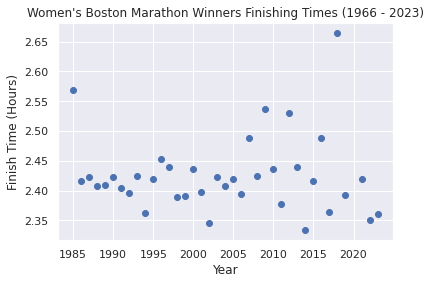

In [21]:
#Scatterplot of Women's Boston Marathon Winners' Finishing Times from 1985 to 2023
plt.scatter(womens_year_1985present, womens_time_1985present)
plt.xlabel("Year")
plt.ylabel("Finish Time (Hours)")
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.show()

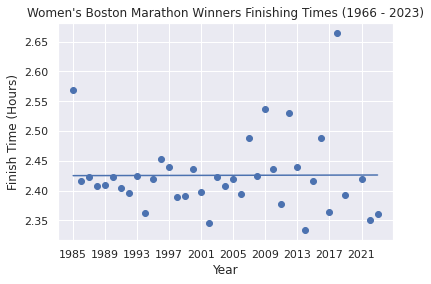

Model slope:  2.758148164818934e-05 hours or 0.09929333393348162 seconds
Model intercept:  2.3703011895295356 hours
Line of Best Fit Equation: y = 2.758148164818934e-05 * x + 2.3703011895295356


In [22]:
#line of best fit on scatterplot of Women's Boston Marathon Winners' Finishing Times from 1985 to 2023
model_womens_1985present = LinearRegression(fit_intercept = True)

model_womens_1985present.fit(womens_year_1985present[:, np.newaxis], womens_time_1985present)

xfit_womens_1985present = np.linspace(1985,2023)
yfit_womens_1985present = model_womens_1985present.predict(xfit_womens_1985present[:, np.newaxis])

plt.scatter(womens_year_1985present, womens_time_1985present)
plt.xlabel('Year')
plt.xticks(range(1985, 2023, 4))
plt.ylabel('Finish Time (Hours)')
plt.title("Women's Boston Marathon Winners Finishing Times (1966 - 2023)")
plt.plot(xfit_womens_1985present, yfit_womens_1985present)
plt.show()

print("Model slope: ", model_womens_1985present.coef_[0], "hours or", model_womens_1985present.coef_[0] * 3600, "seconds")
print("Model intercept: ", model_womens_1985present.intercept_, "hours")
print("Line of Best Fit Equation: y =", model_womens_1985present.coef_[0], "* x +", model_womens_1985present.intercept_)